This is the second part of the problem that we discussed yesterday. We saw that performance of the classifier doesn't improve by tuning parameters of binary classifier. Because the model-centric approach doesn't work, we try to apply data-centric methods. In this notebook, we show how can we improve the accuracy of the classifier by making the anomaly labels consistent.     

### 1. Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
import pandas as pd

2022-04-05 12:45:31.607955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 12:45:31.607993: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 2. Read the data

There are three columns in the data. The first column contains time indices. The second contains value of time series. Third column consists of labels. If the label is 0, then the value is normal else an anomaly. 

In [2]:
df1 = pd.read_csv("Ex1b.csv");

t = df1['time'].to_numpy();t=t.reshape(np.size(t),1);
y = df1['value'].to_numpy();y=y.reshape(np.size(y),1);
labels = df1['is_anom'].to_numpy();labels=labels.reshape(np.size(labels),1);
anom_ind=np.nonzero(labels)[0]

### 3. Plot the time series without anomaly labels

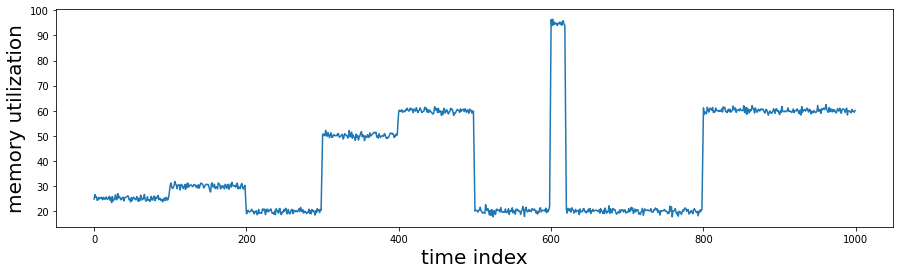

In [3]:
plt.figure(figsize=(15,4))
plt.plot(t,y);
plt.xlabel('time index', fontsize=20)
plt.ylabel('memory utilization', fontsize=20)
#plt.title('Questions: (A) Did you notice anything peculiar about the time series? (B) Can you mark anomalous points?');
#plt.title("Anomaly labels by labeler-2", fontsize=20)
#plt.savefig("labeler_02.jpeg")
plt.show()
#plt.savefig('time_series.jpg')

### 4. Add anomaly labels 

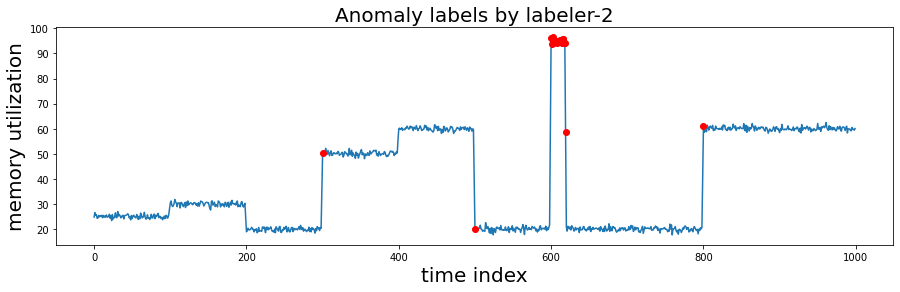

In [4]:
plt.figure(figsize=(15,4))
plt.plot(t,y);
plt.plot(anom_ind,y[anom_ind],'ro')
#plt.title('Questions: (A) Do you agree with the labels? (B) What could be the logic behind this labeling?')
#plt.show()
plt.xlabel('time index', fontsize=20)
plt.ylabel('memory utilization', fontsize=20)
plt.title("Anomaly labels by labeler-2", fontsize=20)
plt.savefig("labeler_02.jpeg")

#plt.savefig('time_series_label2.jpg')

### 5. Data augmentation/ Feature engineering
Data augmentation is one of the main tools of data-centric as well as model-centric AI. In case of image applications, it is common to create more data by doing simple operatins on image like rotation, reflection, etc. In our case, we notice that the time series contains a lot of sharp level changes called change points. Therefore, in addition to the value of time series, the information of change in values should also be used to determine the anomaly labels. 

In [5]:
dy=np.zeros(np.shape(y))
for i in range(1,np.size(y)):
    dy[i]=np.abs(y[i]-y[i-1])

### 6. Model-centric AI
We know that, AI = Code + Data. Suppose we trust the human labeler (subject matter expert) and we want to represent his knowledge in a binary classifier network (anomalous or normal). We will keep the data and the labels fixed and only play with the code (i.e., parameters). Lets see what happens.

### 7. Training a binary classifier
Binary classification is one of the simplest ideas in machine learning. The details can be found here. In this tutorial, we will use tensorflow/keras. You can use other packages like PyTorch for this.  

### Without augmentation

In [6]:
X=y; Y=labels;
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0);

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = (1,), activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=50, epochs=500)

2022-04-05 12:45:34.493911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-05 12:45:34.493954: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-05 12:45:34.493983: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vikas-Inspiron-3558): /proc/driver/nvidia/version does not exist
2022-04-05 12:45:34.494213: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
16/16 [==============================] - 1s 3ms/step - loss: 2.7254 - accuracy: 0.0237
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7542 - accuracy: 0.5225
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.9762
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.9762
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9762
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9762
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9762
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9762
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9762
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9762
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9762
Epoch 83/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9762
Epoch 84/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9762
Epoch 85/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9762
Epoch 86/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9762
Epoch 87/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9762
Epoch 88/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9762
Epoch 89/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.9762
Epoch 90/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9762
Epoch 91/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9762
Epoch 92/500


16/16 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9887
Epoch 164/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9950
Epoch 165/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9950
Epoch 166/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9875
Epoch 167/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9950
Epoch 168/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9950
Epoch 169/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9950
Epoch 170/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9950
Epoch 171/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9950
Epoch 172/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9950
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9950
Epoch 245/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9950
Epoch 246/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9950
Epoch 247/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9950
Epoch 248/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9950
Epoch 249/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9950
Epoch 250/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9950
Epoch 251/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9887
Epoch 252/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9950
Epoch 253/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9950
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9950
Epoch 326/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9950
Epoch 327/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9950
Epoch 328/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9950
Epoch 329/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9950
Epoch 330/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9950
Epoch 331/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9950
Epoch 332/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9950
Epoch 333/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9950
Epoch 334/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9950
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9950
Epoch 407/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9950
Epoch 408/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9950
Epoch 409/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9950
Epoch 410/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9950
Epoch 411/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9950
Epoch 412/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9950
Epoch 413/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9950
Epoch 414/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9950
Epoch 415/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9950
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9950
Epoch 488/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9950
Epoch 489/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9950
Epoch 490/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9950
Epoch 491/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9950
Epoch 492/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9950
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9950
Epoch 494/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9950
Epoch 495/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9950
Epoch 496/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9950
Epoc

In [7]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.00799066573381424
Test accuracy: 1.0


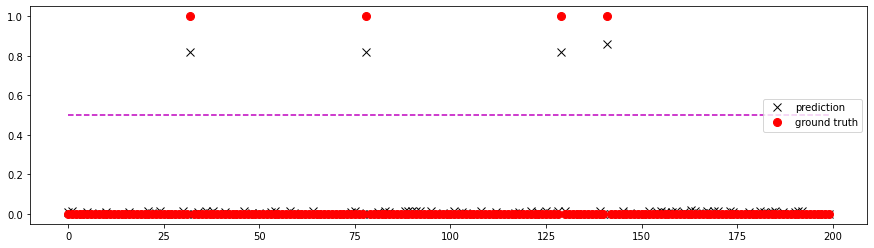

In [8]:
y_pred=model.predict(X_test)
plt.figure(figsize=(15,4))
plt.plot(y_pred,'kx',markersize=8,label ='prediction')
plt.plot(y_test,'ro',markersize=8,label ='ground truth')
plt.plot(0.5*np.ones(np.shape(y_test)),'--m')
plt.legend(loc='center right')
plt.show()

### With augmentation

In [9]:
X=np.concatenate((y,dy),axis = 1); Y=labels;
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0);

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = (2,), activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=50, epochs=500)

Epoch 1/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.9762
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.9762
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9762
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9762
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9762
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9762
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9762
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9762
Epoch 9/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9762
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9762
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9912
Epoch 84/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9862
Epoch 85/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9875
Epoch 86/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9887
Epoch 87/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9925
Epoch 88/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9937
Epoch 89/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9875
Epoch 90/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9937
Epoch 91/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9937
Epoch 92/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9900
Epoch 93/500


16/16 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9987
Epoch 165/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 166/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9987
Epoch 167/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9975
Epoch 168/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9975
Epoch 169/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9975
Epoch 170/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9975
Epoch 171/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9975
Epoch 172/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9975
Epoch 173/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9975
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9987
Epoch 246/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9987
Epoch 247/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9975
Epoch 248/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9975
Epoch 249/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9975
Epoch 250/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9975
Epoch 251/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9975
Epoch 252/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9975
Epoch 253/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9975
Epoch 254/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9987
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9987
Epoch 327/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9975
Epoch 328/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9987
Epoch 329/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9975
Epoch 330/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9987
Epoch 331/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 332/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9975
Epoch 333/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9987
Epoch 334/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9975
Epoch 335/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9975
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9987
Epoch 408/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 409/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 410/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9987
Epoch 411/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9987
Epoch 412/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 413/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9987
Epoch 414/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 415/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 416/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 489/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9987
Epoch 490/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9987
Epoch 491/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9987
Epoch 492/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9987
Epoch 494/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 495/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9987
Epoch 496/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9987
Epoch 497/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9987
Epoc

In [10]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.0010036047315225005
Test accuracy: 1.0


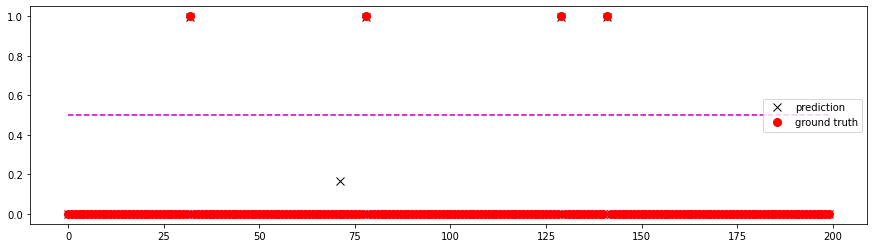

In [12]:
y_pred=model.predict(X_test)
plt.figure(figsize=(15,4))
plt.plot(y_pred,'kx',markersize=8,label ='prediction')
plt.plot(y_test,'ro',markersize=8,label ='ground truth')
plt.plot(0.5*np.ones(np.shape(y_test)),'--m')
plt.legend(loc='center right')
plt.savefig("label_02_result.jpeg")
plt.show()

### Results
Keeping the code same, the accuracy of the classifier dramatically increases (infact it is 100%) after updating the anomaly labels. This is a good example to show the importance of consistent labels.  
### Question
Why our classifier learnt so well? Please think and share your views.  